In [0]:
import os
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import time


##Load binary files.  This is faster than loading from JPG files

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
binary_flder = '/content/drive/Shared drives/DS8013/Data/Binary/'

In [0]:
X = np.load(binary_flder + 'X.npy')
y = np.load(binary_flder + 'y.npy')

In [0]:
len(X)

27000

In [0]:
len(y)

27000

In [0]:
unique_elements, counts_elements = np.unique(y, return_counts=True)

In [0]:
l = list(zip(unique_elements, counts_elements))
print (list(zip(unique_elements, counts_elements)))

[('AnnualCrop', 3000), ('Forest', 3000), ('HerbaceousVegetation', 3000), ('Highway', 2500), ('Industrial', 2500), ('Pasture', 2000), ('PermanentCrop', 2500), ('Residential', 3000), ('River', 2500), ('SeaLake', 3000)]


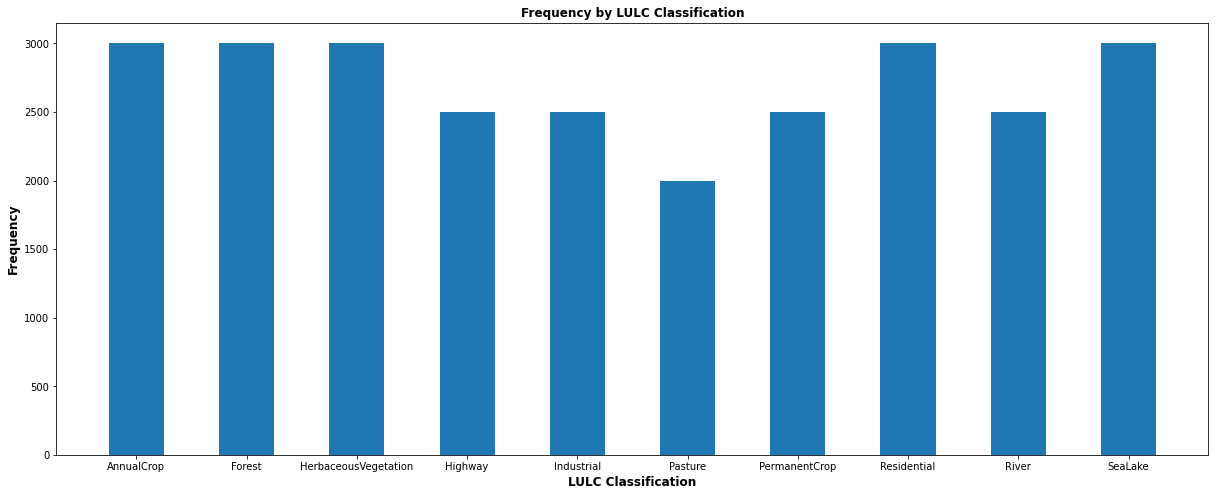

In [0]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(unique_elements,counts_elements, width=0.5)
ax.set_ylabel('Frequency', fontsize='large', fontweight='bold')
ax.set_xlabel('LULC Classification', fontsize='large', fontweight='bold')
ax.set_title('Frequency by LULC Classification', fontsize='large', fontweight='bold')
plt.show()

##Convert to One hot encoding and save

In [0]:
from sklearn import preprocessing

from numpy import array
from numpy import argmax
from keras.utils import to_categorical


#label encoding to integer
le = preprocessing.LabelEncoder()
le.fit(y)

#before encoding
print(y)

#after encoding
label_encoded = le.transform(y)
print(label_encoded)

#reverse encoding
print(le.inverse_transform(label_encoded))

# one hot encode
onehot_encoded = to_categorical(label_encoded)
print(onehot_encoded)

np.save(binary_flder + 'y_onehot.npy', onehot_encoded)


Using TensorFlow backend.


['Highway' 'Highway' 'Highway' ... 'PermanentCrop' 'PermanentCrop'
 'PermanentCrop']
[3 3 3 ... 6 6 6]
['Highway' 'Highway' 'Highway' ... 'PermanentCrop' 'PermanentCrop'
 'PermanentCrop']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
np.unique(le.transform(y))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
list(zip(np.unique(le.transform(y)), le.inverse_transform(np.unique(le.transform(y)))))

[(0, 'AnnualCrop'),
 (1, 'Forest'),
 (2, 'HerbaceousVegetation'),
 (3, 'Highway'),
 (4, 'Industrial'),
 (5, 'Pasture'),
 (6, 'PermanentCrop'),
 (7, 'Residential'),
 (8, 'River'),
 (9, 'SeaLake')]

##View some random images from each class


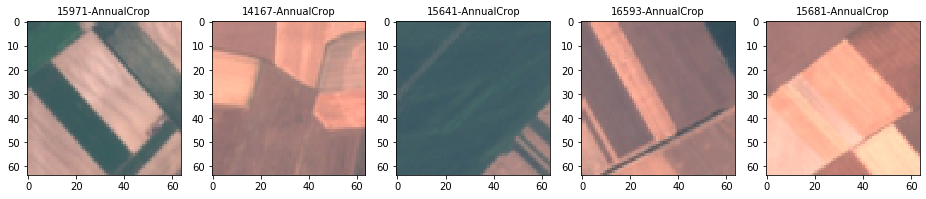

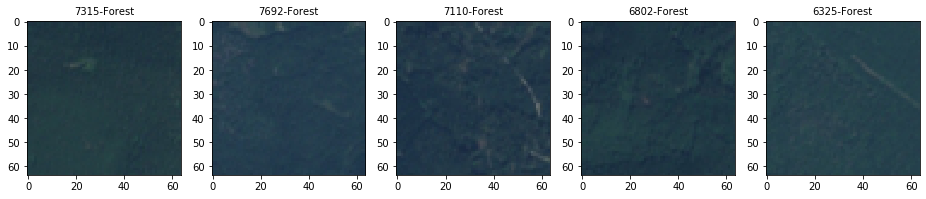

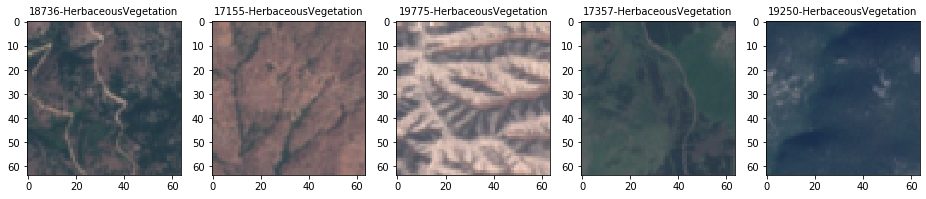

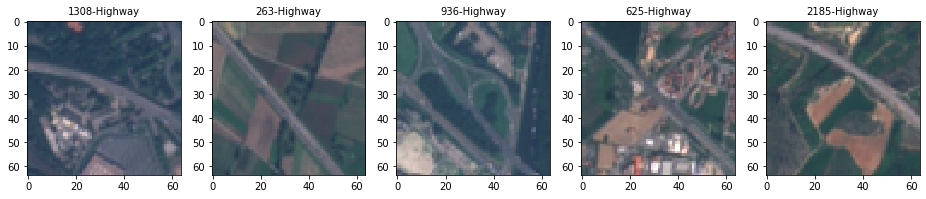

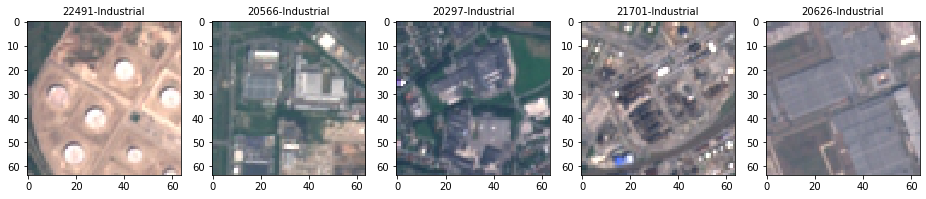

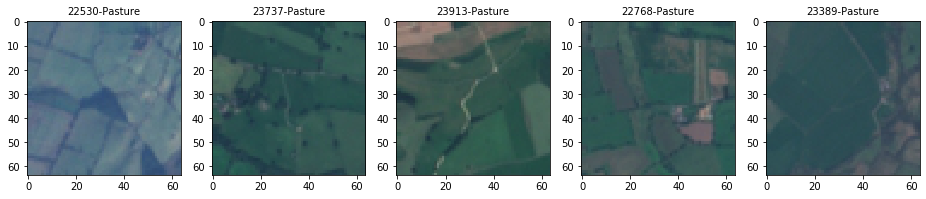

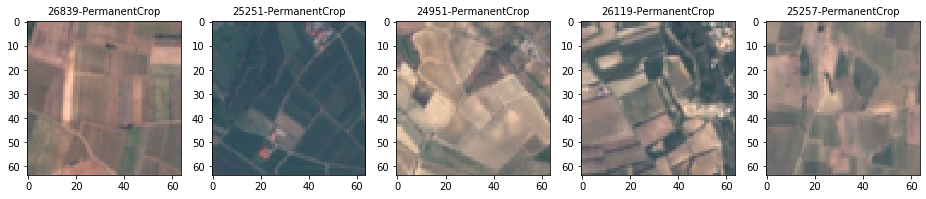

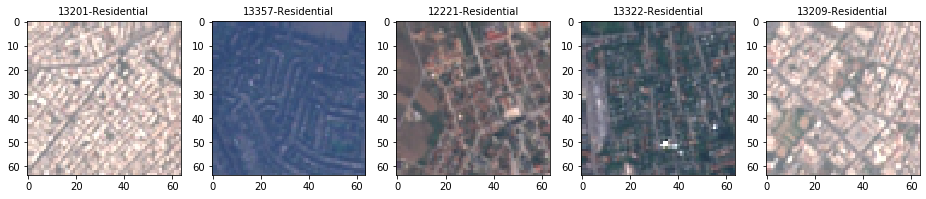

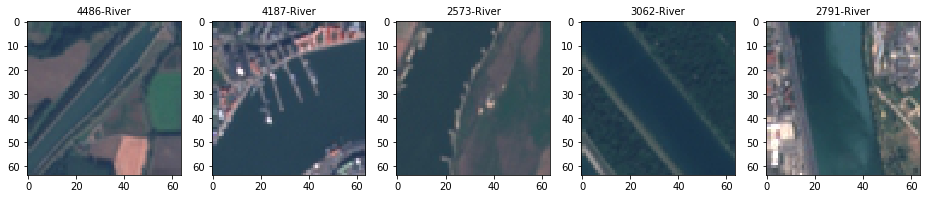

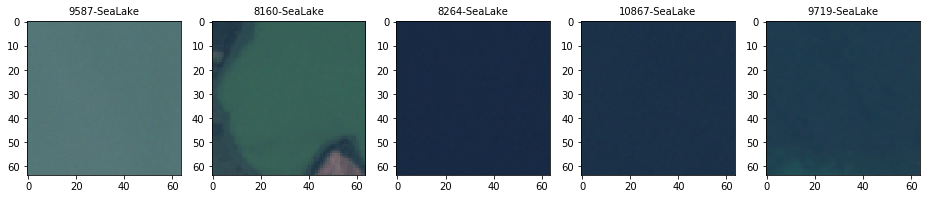

In [0]:
image_classes = unique_elements
rdm_size = 5

y_onehot = np.load(binary_flder + 'y_onehot.npy')
image_classes =  np.unique(le.inverse_transform(argmax(y_onehot, axis=1)))

for image_class in image_classes:
  
  #get the indices of each image class.  
  result = np.where(y == image_class)  #result is a tuple of arrays (one for each axis)
  
  idx_list = result[0]

  #view random images
  rdm_idx_list =  np.random.randint(low=idx_list[0], high=idx_list[-1], size=rdm_size)

  fig, axes = plt.subplots(1, rdm_size, figsize=(16,16))
  
  for i in range(len(rdm_idx_list)):
    axes[i].set_title(str(rdm_idx_list[i]) + '-' + image_class, fontsize=10 )
    axes[i].imshow(X[rdm_idx_list[i]])
